In [1]:
#dependencies
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import gmaps

url = "https://data.lacity.org/resource/2nrs-mtv8.json"
response = requests.get(url).json()

In [2]:
file_one = "../../Resources/crime_data.csv"
file_one_df = pd.read_csv(file_one)
    

In [3]:
crime_df = pd.DataFrame(file_one_df)
crime_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,201220752,09/16/2020 12:00:00 AM,09/16/2020 12:00:00 AM,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301481,211208872,03/19/2021 12:00:00 AM,03/19/2021 12:00:00 AM,1105,12,77th Street,1218,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,58TH ST,FIGUEROA ST,33.9897,-118.2827
301482,210506531,03/04/2021 12:00:00 AM,03/04/2021 12:00:00 AM,2210,5,Harbor,564,2,434,FALSE IMPRISONMENT,...,AA,Adult Arrest,434.0,NaN,NaN,NaN,200 W 2ND ST,NaN,33.7424,-118.2814
301483,211710505,07/09/2021 12:00:00 AM,07/09/2021 12:00:00 AM,1050,17,Devonshire,1798,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,8800 DEMPSEY AV,NaN,34.2302,-118.4775
301484,210312887,07/12/2021 12:00:00 AM,07/12/2021 12:00:00 AM,1200,3,Southwest,363,1,350,"THEFT, PERSON",...,IC,Invest Cont,350.0,NaN,NaN,NaN,CRENSHAW BL,STOCKER ST,34.0088,-118.3351


In [4]:
# Formatting the "Date Occ" row to be more usable
crime_df["DATE OCC"]=pd.to_datetime(crime_df["DATE OCC"])
# Creating cleaned up months and year columns
crime_df["Month Occured"] = [date.month for date in crime_df["DATE OCC"]]
crime_df["Year Occured"] = [date.year for date in crime_df["DATE OCC"]]
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Month Occured,Year Occured
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,1,2020
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,1,2020
2,201220752,09/16/2020 12:00:00 AM,2020-09-16,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630,9,2020
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,1,2020
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,1,2020


In [5]:
Type_Count=crime_df["Crm Cd Desc"].value_counts()

In [6]:
# Finding out the top 10 most common crime types in LA
Total_Type=crime_df["Crm Cd Desc"].count()
Percentage_Type=round((Type_Count / Total_Type) * 100,2).sort_values(ascending=False).head(10)
Percentage_Type

VEHICLE - STOLEN                                           10.80
BATTERY - SIMPLE ASSAULT                                    8.16
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     6.64
BURGLARY FROM VEHICLE                                       6.43
BURGLARY                                                    6.32
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              6.03
INTIMATE PARTNER - SIMPLE ASSAULT                           5.48
THEFT PLAIN - PETTY ($950 & UNDER)                          5.45
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             4.62
THEFT OF IDENTITY                                           3.92
Name: Crm Cd Desc, dtype: float64

In [7]:
Area_Count=crime_df["AREA NAME"].value_counts()
Total_Area=crime_df["AREA NAME"].count()
Percentage_Area=round((Area_Count / Total_Area) * 100,2).sort_values()

In [8]:
Percentage_Area

Foothill       3.46
Devonshire     3.92
Hollenbeck     3.96
West Valley    3.97
Topanga        4.04
Mission        4.12
Van Nuys       4.31
Northeast      4.33
Harbor         4.46
Rampart        4.55
Wilshire       4.61
West LA        4.69
Olympic        4.90
Newton         4.90
N Hollywood    5.13
Hollywood      5.29
Southeast      5.34
Southwest      5.55
Central        5.88
Pacific        6.00
77th Street    6.60
Name: AREA NAME, dtype: float64

In [9]:
crime_df["Vict Sex"].value_counts()

M    128418
F    108795
X     24841
H        31
Name: Vict Sex, dtype: int64

In [10]:
# Convert poverty rate as a list
# Convert bank rate to list
# poverty_rate = crime_df["Poverty Rate"].tolist()

In [11]:
# Create a map using state centroid coordinates to set markers
# marker_locations = census_data[['Latitude', 'Longitude']]

# Create a marker_layer using the poverty list to fill the info box
# fig = gmaps.figure()
# markers = gmaps.marker_layer(marker_locations)
# fig.add_layer(markers)
# fig

In [12]:
Actual_Age=pd.to_numeric(crime_df['Vict Age']).astype(float)


In [13]:
AgeBin = [0,18,25,35,45,65,90]
AgeGroup = ["Children and Teens(0-18)","Young Adults(19-25)", "Mid 20s to Mid 30s(26-35)", "Middle Age(36-45)", "Mid 40s to Mid 60s(46-65)", "Seniors(66-90)"]
crime_df["Age Group"]=pd.cut(Actual_Age,AgeBin,labels=AgeGroup,include_lowest=True)
crime_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Month Occured,Year Occured,Age Group
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,1,2020,Middle Age(36-45)
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,1,2020,Young Adults(19-25)
2,201220752,09/16/2020 12:00:00 AM,2020-09-16,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630,9,2020,Mid 40s to Mid 60s(46-65)
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,1,2020,Seniors(66-90)
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,1,2020,Mid 20s to Mid 30s(26-35)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301481,211208872,03/19/2021 12:00:00 AM,2021-03-19,1105,12,77th Street,1218,1,510,VEHICLE - STOLEN,...,NaN,NaN,NaN,58TH ST,FIGUEROA ST,33.9897,-118.2827,3,2021,Children and Teens(0-18)
301482,210506531,03/04/2021 12:00:00 AM,2021-03-04,2210,5,Harbor,564,2,434,FALSE IMPRISONMENT,...,NaN,NaN,NaN,200 W 2ND ST,NaN,33.7424,-118.2814,3,2021,Middle Age(36-45)
301483,211710505,07/09/2021 12:00:00 AM,2021-07-09,1050,17,Devonshire,1798,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,NaN,NaN,8800 DEMPSEY AV,NaN,34.2302,-118.4775,7,2021,Middle Age(36-45)
301484,210312887,07/12/2021 12:00:00 AM,2021-07-12,1200,3,Southwest,363,1,350,"THEFT, PERSON",...,NaN,NaN,NaN,CRENSHAW BL,STOCKER ST,34.0088,-118.3351,7,2021,Children and Teens(0-18)


In [14]:
crime_df["Age Group"].value_counts()

Children and Teens(0-18)     82513
Mid 20s to Mid 30s(26-35)    63658
Mid 40s to Mid 60s(46-65)    60543
Middle Age(36-45)            47119
Young Adults(19-25)          32943
Seniors(66-90)               14288
Name: Age Group, dtype: int64

In [15]:
Total_Victims=crime_df["Vict Age"].count()
Group_Count=crime_df["Age Group"].value_counts()
Percentage_Age=round((Group_Count / Total_Victims) * 100,2)

([<matplotlib.patches.Wedge at 0x1e5dce5a280>,
 [Text(-1.1841155308867317, -0.19460321043814668, 'Children and Teens(0-18)'),
  Text(0.1288237113130024, -1.0924305247490773, 'Mid 20s to Mid 30s'),
  Text(1.086405217777524, -0.17240563443742374, 'Mid 40s to Mid 60s'),
  Text(0.6253924308640945, 0.9049222659532138, 'Middle Age(36-45)'),
  Text(-0.25154204211282555, 1.0708532117193792, 'Young Adults(19-25)'),
  Text(-0.7282707326481848, 0.8243917393861223, 'Seniors(66-90)')],
 [Text(-0.6907340596839268, -0.11351853942225223, '27.4%'),
  Text(0.0702674788980013, -0.5958711953176785, '21.1%'),
  Text(0.5925846642422858, -0.09403943696586749, '20.1%'),
  Text(0.34112314410768785, 0.49359396324720745, '15.7%'),
  Text(-0.13720475024335937, 0.584101751846934, '10.9%'),
  Text(-0.3972385814444644, 0.4496682214833394, '4.7%')])

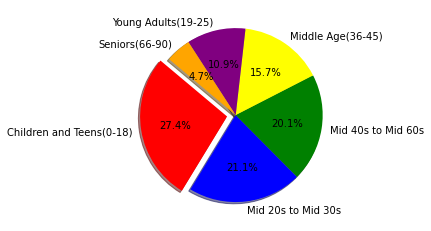

In [16]:
labels=["Children and Teens(0-18)","Mid 20s to Mid 30s","Mid 40s to Mid 60s","Middle Age(36-45)","Young Adults(19-25)","Seniors(66-90)"]
sizes=[82513,63658,60543,47119,32943,14288]
colors=["red","blue","green","yellow","purple","orange"]
explode = (0.1,0,0,0,0,0)
plt.pie(sizes,labels=labels, colors=colors,explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [17]:
Gender_Victims=crime_df["Vict Sex"].value_counts()
Percentage_Gender=round((Gender_Victims / Total_Victims) * 100,2)

In [18]:
Percentage_Gender

M    42.60
F    36.09
X     8.24
H     0.01
Name: Vict Sex, dtype: float64

In [19]:
Percentage_Age

Children and Teens(0-18)     27.37
Mid 20s to Mid 30s(26-35)    21.11
Mid 40s to Mid 60s(46-65)    20.08
Middle Age(36-45)            15.63
Young Adults(19-25)          10.93
Seniors(66-90)                4.74
Name: Age Group, dtype: float64

In [20]:
# Group by gender from the dataframe and performing basic functions off of it
Gender_Tracker = crime_df.groupby("Vict Sex")
Victim_By_Gender = (Gender_Tracker["Vict Sex"]).count()
Percentage_Victims = (Victim_By_Gender / Total_Victims) * 100
# Created a new dataframe that visualizes player count by gender
Gender_df = pd.DataFrame({"Percentage of Victims": Percentage_Age})
Sorted_df = Gender_df.sort_values("Percentage of Victims", ascending = False)
Sorted_df

,Percentage of Victims
Children and Teens(0-18),27.37
Mid 20s to Mid 30s(26-35),21.11
Mid 40s to Mid 60s(46-65),20.08
Middle Age(36-45),15.63
Young Adults(19-25),10.93
Seniors(66-90),4.74


In [21]:
count=crime_df["Premis Desc"].value_counts().sort_values(ascending=False).head(7)
count

STREET                                          77849
SINGLE FAMILY DWELLING                          49567
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    36190
PARKING LOT                                     22274
SIDEWALK                                        14057
OTHER BUSINESS                                  13778
VEHICLE, PASSENGER/TRUCK                        10364
Name: Premis Desc, dtype: int64

([<matplotlib.patches.Wedge at 0x1e5dcfa9370>,
 [Text(-1.1083732860712041, -0.4599007052872621, 'Street'),
  Text(0.6291547688503368, -0.9023105212912456, 'Single Family Dwelling'),
  Text(1.0683643025319547, 0.26191165891462365, 'Apartments'),
  Text(0.5376851515738992, 0.9596325743621634, 'Parking Lot'),
  Text(0.0014933920896380152, 1.0999989862631996, 'Sidewalk'),
  Text(-0.4170773748561455, 1.017863676227375, 'Business Area'),
  Text(-0.7313909485709771, 0.8216247807536275, 'Vehicle')],
 [Text(-0.6465510835415356, -0.26827541141756955, '34.7%'),
  Text(0.3431753284638201, -0.4921693752497702, '22.1%'),
  Text(0.5827441650174298, 0.14286090486252195, '16.2%'),
  Text(0.29328280994939954, 0.5234359496520891, '9.9%'),
  Text(0.0008145775034389173, 0.5999994470526543, '6.3%'),
  Text(-0.22749674992153385, 0.5551983688512954, '6.1%'),
  Text(-0.3989405174023511, 0.4481589713201604, '4.6%')])

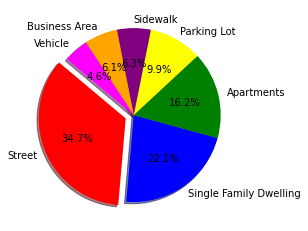

In [22]:
labels=["Street","Single Family Dwelling","Apartments","Parking Lot","Sidewalk","Business Area","Vehicle"]
sizes=[77849,49567,36190,22274,14057,13778,10364]
colors=["red","blue","green","yellow","purple","orange","magenta"]
explode = (0.1,0,0,0,0,0,0)
plt.pie(sizes,labels=labels,explode=explode,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# According to this pie chart, the street is the most common premise for crimes to happen with single family residentials come at second place

In [23]:
Street_Crimes_df=crime_df.loc[crime_df["Premis Desc"]=="STREET",:]
Street_Crimes_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Month Occured,Year Occured,Age Group
9,201817357,09/12/2020 12:00:00 AM,2020-09-12,30,18,Southeast,1871,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,NaN,NaN,NaN,ROSECRANS,VERMONT,33.9019,-118.2916,9,2020,Young Adults(19-25)
10,200100509,01/04/2020 12:00:00 AM,2020-01-04,2200,1,Central,192,1,330,BURGLARY FROM VEHICLE,...,NaN,NaN,NaN,15TH,OLIVE,34.0359,-118.2648,1,2020,Mid 20s to Mid 30s(26-35)
15,201811813,05/28/2020 12:00:00 AM,2020-05-25,200,18,Southeast,1851,1,510,VEHICLE - STOLEN,...,NaN,NaN,NaN,MENLO AV,130TH ST,33.9144,-118.2894,5,2020,Children and Teens(0-18)
24,201713253,09/15/2020 12:00:00 AM,2020-09-14,1305,17,Devonshire,1776,1,510,VEHICLE - STOLEN,...,NaN,NaN,NaN,16700 LABRADOR ST,NaN,34.2493,-118.4965,9,2020,Children and Teens(0-18)
27,200505212,01/29/2020 12:00:00 AM,2020-01-26,1200,5,Harbor,529,1,510,VEHICLE - STOLEN,...,NaN,NaN,NaN,E,BROAD,33.7753,-118.2456,1,2020,Children and Teens(0-18)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301475,210208054,04/12/2021 12:00:00 AM,2021-04-02,1730,2,Rampart,235,2,662,"BUNCO, GRAND THEFT",...,998.0,NaN,NaN,200 S CORONADO ST,NaN,34.0657,-118.2781,4,2021,Middle Age(36-45)
301478,210404776,01/21/2021 12:00:00 AM,2021-01-19,1600,4,Hollenbeck,497,1,510,VEHICLE - STOLEN,...,NaN,NaN,NaN,1400 S DE LA TORRE WY,NaN,34.0166,-118.2058,1,2021,Children and Teens(0-18)
301480,212110947,07/04/2021 12:00:00 AM,2021-07-04,2135,21,Topanga,2143,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,NaN,NaN,23100 FRIAR ST,NaN,34.1855,-118.6296,7,2021,Middle Age(36-45)
301484,210312887,07/12/2021 12:00:00 AM,2021-07-12,1200,3,Southwest,363,1,350,"THEFT, PERSON",...,NaN,NaN,NaN,CRENSHAW BL,STOCKER ST,34.0088,-118.3351,7,2021,Children and Teens(0-18)


In [24]:
Grouped_Street_df=Street_Crimes_df.groupby(["Crm Cd Desc"])
Grouped_Street_df

In [25]:
Street_Count=Grouped_Street_df["AREA NAME"].value_counts()
Street_Count

Crm Cd Desc                 AREA NAME  
ARSON                       77th Street    20
                            Newton         17
                            Southeast      16
                            Rampart        12
                            Central        11
                                           ..
WEAPONS POSSESSION/BOMBING  Hollywood       1
                            Olympic         1
                            Pacific         1
                            Southwest       1
                            West LA         1
Name: AREA NAME, Length: 1418, dtype: int64

In [26]:
Street_Crimes_df["Crm Cd Desc"].value_counts().head(7)

VEHICLE - STOLEN                                    24091
BURGLARY FROM VEHICLE                                8467
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)      8211
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       6511
THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)     4275
BATTERY - SIMPLE ASSAULT                             3780
ROBBERY                                              3248
Name: Crm Cd Desc, dtype: int64

([<matplotlib.axis.XTick at 0x1e5dd00dc70>,
 [Text(0, 0, 'Stolen Vehicles'),
  Text(1, 0, 'Vehicle Burglary'),
  Text(2, 0, 'Petty Vehicle Theft'),
  Text(3, 0, 'Assault with Deadly Weapon'),
  Text(4, 0, 'Grand Theft Auto'),
  Text(5, 0, 'Simple Battery'),
  Text(6, 0, 'Robbery')])

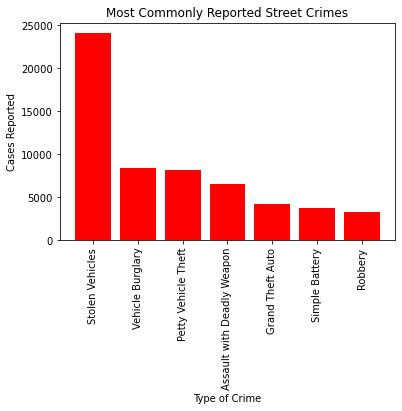

In [27]:
crimetype = ["Stolen Vehicles","Vehicle Burglary","Petty Vehicle Theft","Assault with Deadly Weapon","Grand Theft Auto","Simple Battery","Robbery"]
crimecount=[24091,8467,8211,6511,4275,3780,3248]
x_axis=np.arange(len(crimetype))
plt.bar(x_axis,crimecount,color='r',align='center')
plt.xlabel("Type of Crime")
plt.ylabel("Cases Reported")
plt.title("Most Commonly Reported Street Crimes")
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations,crimetype,rotation=90)
# Following up with the observation above, we break down the most commonly reported criminal activities that occured on the streets of LA 

In [28]:
# How many criminal activities were reported in 2020?
twenty_crime=crime_df.loc[crime_df["Year Occured"]==2020,:]
# 197,067 criminal incidents were reported in 2020
twenty_crime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Month Occured,Year Occured,Age Group
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,1,2020,Middle Age(36-45)
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,1,2020,Young Adults(19-25)
2,201220752,09/16/2020 12:00:00 AM,2020-09-16,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630,9,2020,Mid 40s to Mid 60s(46-65)
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,1,2020,Seniors(66-90)
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,1,2020,Mid 20s to Mid 30s(26-35)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197062,200814793,10/02/2020 12:00:00 AM,2020-10-02,1330,8,West LA,853,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,998.0,NaN,NaN,11400 SANTA MONICA BL,NaN,34.0457,-118.4511,10,2020,Children and Teens(0-18)
197063,210612830,07/17/2021 12:00:00 AM,2020-12-15,1200,6,Hollywood,659,1,310,BURGLARY,...,NaN,NaN,NaN,5100 W SUNSET BL,NaN,34.0981,-118.3010,12,2020,Seniors(66-90)
197064,200315957,08/18/2020 12:00:00 AM,2020-08-18,1130,3,Southwest,362,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,NaN,NaN,4800 OBAMA BL,NaN,34.0214,-118.3486,8,2020,Mid 40s to Mid 60s(46-65)
197065,211009262,06/20/2021 12:00:00 AM,2020-07-11,1000,10,West Valley,1065,1,310,BURGLARY,...,NaN,NaN,NaN,18000 VENTURA BL,NaN,34.1675,-118.5226,7,2020,Mid 20s to Mid 30s(26-35)


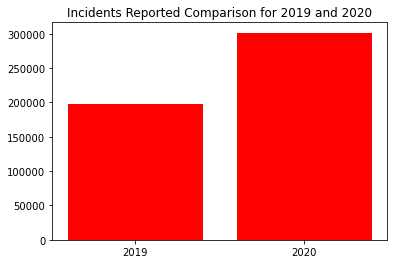

In [51]:
# Comparing number of crimes reported in 2019 vs 2020
x_axis=[2019,2020]
y_axis=[197067,301486]
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations,x_axis)
plt.bar(x_axis,y_axis,color='r')
plt.title("Incidents Reported Comparison for 2019 and 2020")
plt.savefig("../../Graphs and Plots/TwoYearComparison.png")

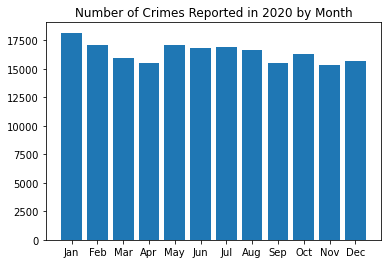

In [52]:
# Creating a bar chart to display reports per month in 2020
months=twenty_crime.groupby("Month Occured").count()
x_axis=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
y_axis=months["AREA NAME"]
plt.bar(x_axis,y_axis)
plt.title("Number of Crimes Reported in 2020 by Month")
plt.savefig("../../Graphs and Plots/2020byMonth.png")

In [30]:
# Creating path to read 2019 crime csv
file_two = "../../Resources/crime_data_2019.csv"
file_two_df = pd.read_csv(file_two)
file_two_df.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,<<<<<<< HEAD
DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
190514702,8/28/2019 0:00,1/1/2010 0:00,1200,5,Harbor,524,2,860,BATTERY WITH SEXUAL CONTACT,1804 0522 0913,31,F,H,402,MARKET,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,860,NaN,NaN,NaN,600 WILMINGTON BL,NaN,33.7749,-118.2764
191916104,9/4/2019 0:00,9/4/2010 0:00,1900,19,Mission,1944,1,820,ORAL COPULATION,1817 0507 0559 1258 0532 0536 0506,8,F,H,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,812,820,NaN,NaN,14300 FOX ST,NaN,34.2726,-118.4447
191311884,5/22/2019 0:00,1/1/2010 0:00,1900,13,Newton,1367,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER),1258 0522 0551,6,F,H,109,PARK/PLAYGROUND,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,812,860,NaN,NaN,4700 HONDURAS ST,NaN,34.001,-118.2441
191821515,10/7/2019 0:00,7/9/2010 0:00,1210,18,Southeast,1801,2,354,THEFT OF IDENTITY,0100 1822,29,F,I,710,OTHER PREMISE,NaN,NaN,IC,Invest Cont,354,NaN,NaN,NaN,8800 S HOOVER ST,NaN,33.958,-118.2869


In [33]:
nineteen_crime_df = pd.DataFrame(file_two_df)
nineteen_crime_df.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,<<<<<<< HEAD
DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
190514702,8/28/2019 0:00,1/1/2010 0:00,1200,5,Harbor,524,2,860,BATTERY WITH SEXUAL CONTACT,1804 0522 0913,31,F,H,402,MARKET,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,860,NaN,NaN,NaN,600 WILMINGTON BL,NaN,33.7749,-118.2764
191916104,9/4/2019 0:00,9/4/2010 0:00,1900,19,Mission,1944,1,820,ORAL COPULATION,1817 0507 0559 1258 0532 0536 0506,8,F,H,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,812,820,NaN,NaN,14300 FOX ST,NaN,34.2726,-118.4447
191311884,5/22/2019 0:00,1/1/2010 0:00,1900,13,Newton,1367,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER),1258 0522 0551,6,F,H,109,PARK/PLAYGROUND,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,812,860,NaN,NaN,4700 HONDURAS ST,NaN,34.001,-118.2441
191821515,10/7/2019 0:00,7/9/2010 0:00,1210,18,Southeast,1801,2,354,THEFT OF IDENTITY,0100 1822,29,F,I,710,OTHER PREMISE,NaN,NaN,IC,Invest Cont,354,NaN,NaN,NaN,8800 S HOOVER ST,NaN,33.958,-118.2869


In [53]:
# Formatting the "Date Occ" row to be more usable
nineteen_crime_df["Date Rptd"]=pd.to_datetime(nineteen_crime_df["Date Rptd"])
# Creating cleaned up months and year columns
nineteen_crime_df["Month Occured"] = [date.month for date in nineteen_crime_df["Date Rptd"]]
nineteen_crime_df["Year Occured"] = [date.year for date in nineteen_crime_df["Date Rptd"]]
nineteen_crime_df.head()

KeyError: 'Date Rptd'

In [54]:
combined_df=pd.merge(twenty_crime,nineteen_crime_df,on="DR_NO", how="outer")

KeyError: 'DR_NO'

In [55]:
count=twenty_crime["Premis Desc"].value_counts().sort_values(ascending=False).head(7)
count

STREET                                          50305
SINGLE FAMILY DWELLING                          32986
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    23630
PARKING LOT                                     14425
SIDEWALK                                         9304
OTHER BUSINESS                                   9091
VEHICLE, PASSENGER/TRUCK                         6751
Name: Premis Desc, dtype: int64

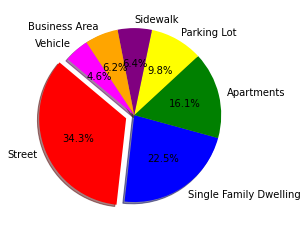

In [57]:
labels=["Street","Single Family Dwelling","Apartments","Parking Lot","Sidewalk","Business Area","Vehicle"]
sizes=[50305,32986,23630,14425,9304,9091,6751]
colors=["red","blue","green","yellow","purple","orange","magenta"]
explode = (0.1,0,0,0,0,0,0)
plt.pie(sizes,labels=labels,explode=explode,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("../../Graphs and Plots/2020CrimeType.png")
# According to this pie chart, the street is the most common premise for crimes to happen with single family residentials come at second place